# AIN 214 - PA5 - 2023 on Clustering

This homework aims to deepen your understanding of clustering algorithms and introduce the concept of dimensionality reduction using Principal Component Analysis (PCA). You will use K-Means and Agglomerative Clustering, and explore the impact of PCA on these clustering techniques.



# Student Info
## Name Surname: Alperen Demirci
## Student ID: 2220765010


## Dataset

We will use the Mall Customer Segmentation Data from Kaggle. The dataset is added to the homework folder - also accessible at [here](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/).
 

### Importing the necessary libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset...

In [37]:
df_read = pd.read_csv('Mall_Customers.csv', sep=',')

In [38]:
df_read.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 1. Data Cleaning

* **Objective**: Prepare your dataset for analysis.
* **Tasks**: Handle missing values, encode categorical features, handle outliers.

The steps for data cleaning may vary. I do not expect you to use a spefisific algorithm to handle outliers for example. But **show your work!**


### Steps for Data Cleaning 
1. Check for null / NaN values.
2. Drop unnnecessary columns and rows.
3. Check unique values of features and analyze them.
4. Inspect the distribution of features 
5. Check for outliers
6. Handle the outliers (dropping,imputing,adding error from N(0,MSE) etc. )
7. Encode categorical values.


### Check for null or empty values

In [39]:
for col in df_read.columns:
    print("Column : ",col," has ",len(df_read.loc[df_read[col].isnull()])," null values")

Column :  CustomerID  has  0  null values
Column :  Gender  has  0  null values
Column :  Age  has  0  null values
Column :  Annual Income (k$)  has  0  null values
Column :  Spending Score (1-100)  has  0  null values


### Checked the info and description of the dataset.

In [40]:
df_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [41]:
df_read.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [42]:
df_read['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

1. First we can say that we have no null or empty values for any feature.

2. We have a category imbalance in 'Gender' column. Ratio between binary classes is %56 which will not create a huge difference in my opinion.

3. When we check for meaningless values for every feature (for example a person being 0 or less years old which is impossible), we see that there are no absurd values seen through description of the dataframe.

4. ID column is an unnecessary column for this dataset since it expresses the same information as the dataframes' builtin indexer.

### Drop unnecessary columns and rows

In [43]:
# Only unnecessary column is ID. Dropping...
df_read.drop("CustomerID",inplace=True,axis=1)

### Check the distributions of the features.

In [44]:
# Discriminating numerical and categorical features

l_cat=[]
l_num=[]
for col in df_read.columns:
    if df_read[col].dtype == "object":
        l_cat.append(col)
    else:
        l_num.append(col)

1


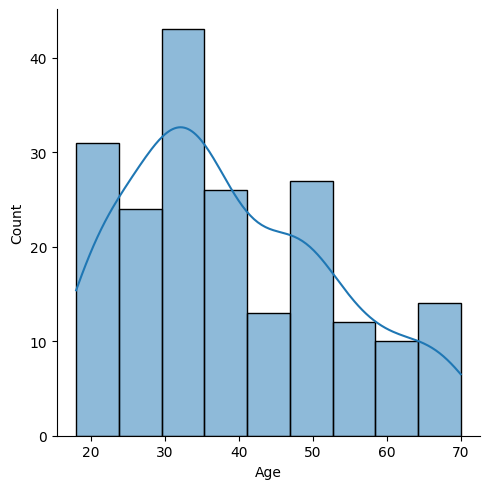

1


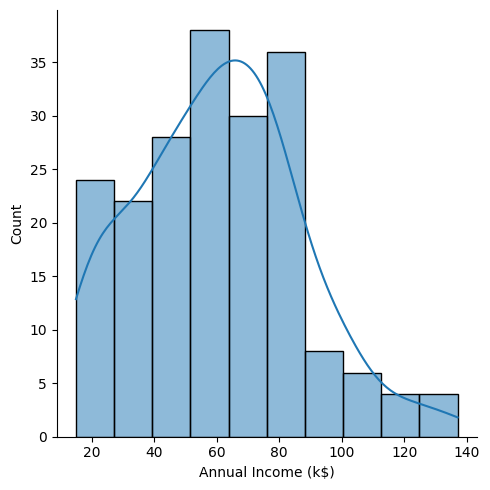

1


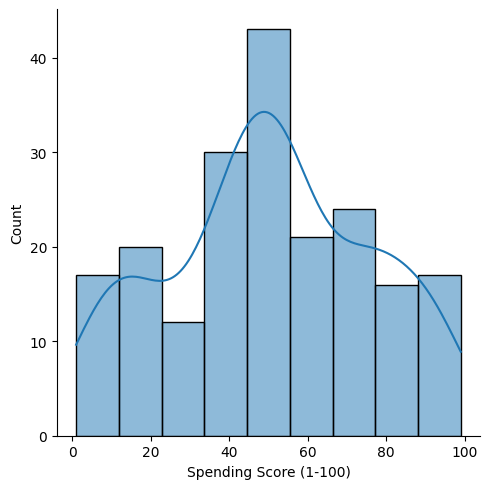

In [45]:
for col in l_num:
    print("1")
    sns.displot(df_read[col],kde=True)
    plt.show()

We do not have a high skewed distribution when we check the graphs. That may be a good sign for our model.

### Check for Outliers

* I will use the IQR Method for detecting outliers.

* IQR = (Q75 - Q25) , values NOT in range (mean - 1.5 * Q25 , mean + 1.5 *  Q75) are considered as outliers.


In [46]:
for ele in l_num:
    IQR = df_read[ele].quantile(0.75) - df_read[ele].quantile(0.25)
    mean = df_read[ele].mean()

    df_read = df_read.loc[(df_read[ele]<(mean+1.5*IQR)) & (df_read[ele]>(mean-1.5*IQR))]

print("Length of the dataset after dropping the outliers : ",len(df_read))

Length of the dataset after dropping the outliers :  192


When we drop the outliers, we only erase 8 of those values.

In my opinion there is no need to impute those values since they have cover only %4 of the whole.

As a result, I dropped these values for the reasons I've mentioned above.

### Encoding the categorical values

We have only one categorical variable (Gender) which is a binary variable.

I'll encode Male category as 1 and Female as 0.

In [47]:
df_read['Male'] = df_read['Gender'].apply(lambda x: 1 if x=='Male' else 0)
df_read.drop("Gender",inplace=True,axis=1)

In [48]:
df_read.head()

,Age,Annual Income (k$),Spending Score (1-100),Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [49]:
# We need to update our categorical and numerical features list
# Since we do not have any categorical features now, we can take all the features as numerical
l_num = df_read.columns
l_col = []

## 2. Data Preprocessing

* **Objective**: Transform raw data into a format suitable for ML algorithms: PCA, and clustering, such as normalization.

### Steps for Data Preprocessing
1. Check distributions of every feature
2. Normalize every feature between 1 and 11
3. If needed, try to transform your skewed data.(Log transformation,exponential transformation etc.)
4. Check for the correlation between features

Checking the distributions of features : 

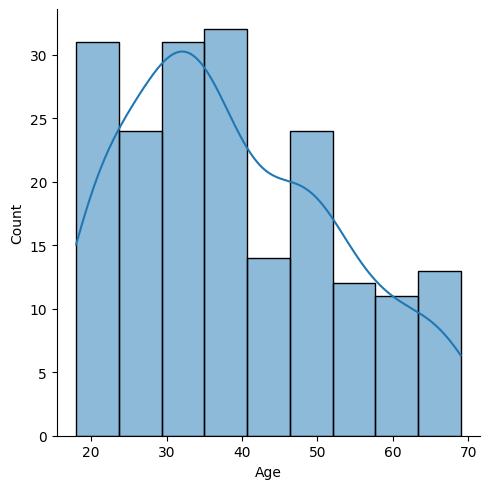

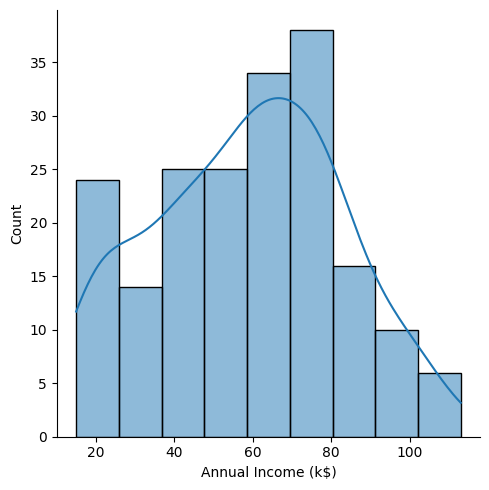

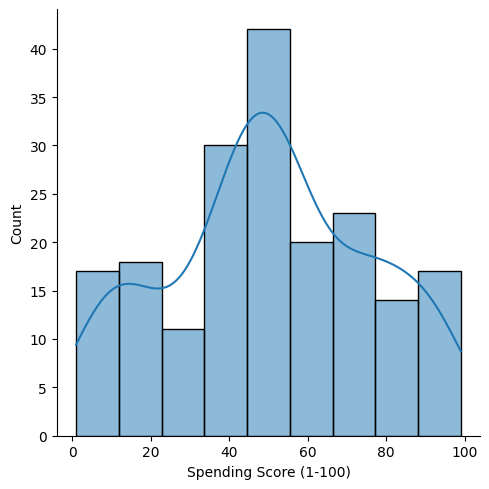

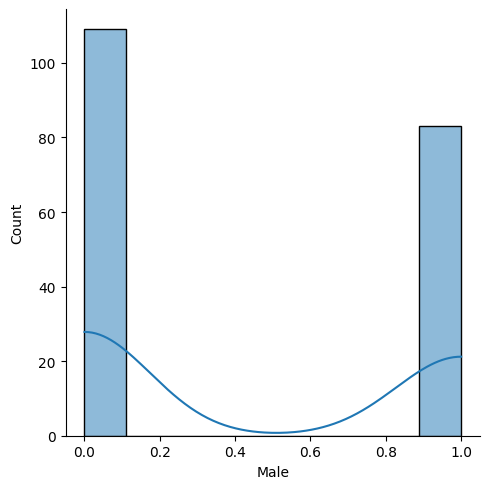

In [50]:
for ele in l_num:
    sns.displot(df_read[ele],kde=True)
    plt.show()

As I've mentioned before, we do not have a feature that has an extremely skewed distribution.

That's why we don't need to deal with transformations etc.

### Normalizing the features

* I have normalized the features between 1 and 11 instead of 0 to 1.
* Because if I map values to a 0-1 which is a *narrower* range compared to 1-11, then I would have to deal with presicion errors which will lose information.
* Reason I added 1 to the range (0-10) is that I do not want minimum values to affect directly 0 to the model I'll use.

In [51]:
from sklearn.preprocessing import MinMaxScaler
n = MinMaxScaler((1,11))
for ele in l_num:
    df_read[ele] = n.fit_transform(df_read[ele].values.reshape(-1,1))

In [52]:
df_read.describe()

,Age,Annual Income (k$),Spending Score (1-100),Male
count,192.000000,192.000000,192.000000,192.000000
mean,5.036969,5.448873,6.016475,5.322917
std,2.713773,2.436260,2.636158,4.966895
min,1.000000,1.000000,1.000000,1.000000
25%,2.960784,3.551020,4.469388,1.000000
50%,4.529412,5.642857,6.000000,1.000000
75%,7.078431,7.326531,8.270408,11.000000
max,11.000000,11.000000,11.000000,11.000000


### Correlation Matrix

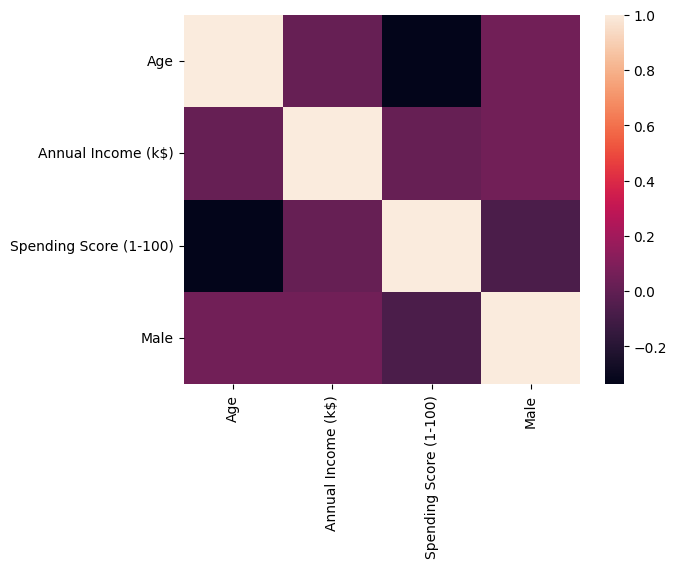

,Age,Annual Income (k$),Spending Score (1-100),Male
Age,1.000000,0.012680,-0.337711,0.050382
Annual Income (k$),0.012680,1.000000,0.013857,0.051782
Spending Score (1-100),-0.337711,0.013857,1.000000,-0.073608
Male,0.050382,0.051782,-0.073608,1.000000


In [53]:
sns.heatmap(df_read.corr())
plt.show()
df_read.corr()

## 3. Dimensionality Reduction

### What is Dimensionality Reduction and Why is it Used?
Dimensionality reduction is the process of reducing the number of random variables under consideration by obtaining a set of principal variables. It is an attempt to reduce the complexity of the task as an attempt to remove the curse of dimensionality - also for visualization purposes.

### 3.1. Principal Component Analysis (PCA)
PCA is a technique that transforms original correlated features into new uncorrelated features (principal components) based on variance.
**Process:**
* **Linear Combinations of Features:** PCA begins by creating linear combinations of the existing features in the dataset.
* **First Principal Component:** The first principal component (PC1) is the linear combination that captures the highest variance in the dataset. Mathematically, this is the direction in which the data varies the most.
* **Subsequent Principal Components:** Each following principal component is the linear combination of features that captures the highest variance possible while being orthogonal (perpendicular) to all previously determined principal components. This ensures that each new principal component adds unique information.
* **Covariance Matrix and Eigenvectors:** The process of finding these principal components corresponds to computing the eigenvectors of the covariance matrix of the data. The covariance matrix encapsulates how each pair of variables in the dataset co-varies.
* **Eigenvalues:** The eigenvalues associated with each eigenvector (principal component) indicate the amount of variance that the principal component explains. Larger eigenvalues mean more variance explained.





### 3.2. Apply PCA
* Normalize the data
* Apply PCA to the normalized data using scikit-learn
* Visualize the data with the first two principal components (PC) as the axes. Do you see any clusters?
* Components selection: Visualize the variance explained by each PC. Then choose the number of components that explain the data sufficiently enough.

**Simply use the PCA from sklearn library**

### Since we have normalized our data in the Data Preprocessing part, we do not need to do it again.

### How much variance will be explained by dimension of the data?

In [54]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
imp_features=pca.fit_transform(df_read)
print(pca.explained_variance_ratio_)

[0.55168357 0.21137943 0.1319765  0.1049605 ]


We can see that with 2 dimensions, we can express the %76 of the variance which is not bad considering if we use only two PC.

Let's visualize our result!

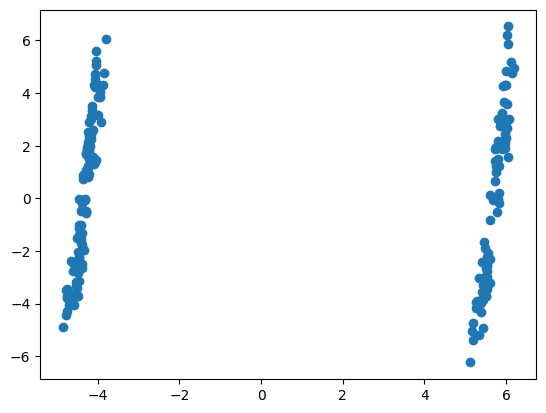

In [55]:
plt.scatter(imp_features[:,0],imp_features[:,1])
plt.show()

We can clearly see that there exist 2 distinct clusters when we visualize the data based on the 2 most important dimensions.

### Visualizing the Variance explained by n number of features

In [56]:
l_var=[]
for i in range(1,len(l_num)+1):
    l_var.append(np.sum(pca.explained_variance_ratio_[:i]))

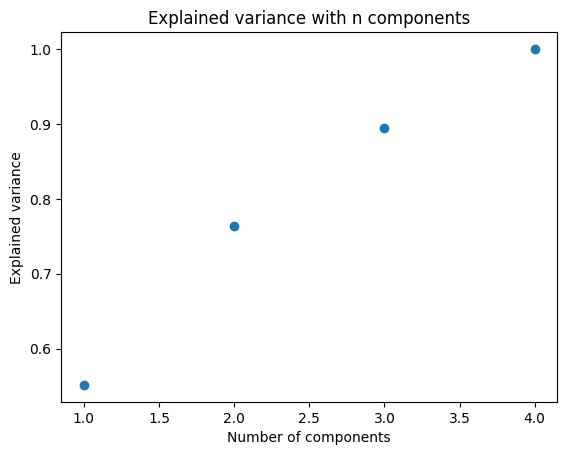

In [57]:
plt.scatter(range(1,len(l_num)+1),l_var)
plt.title("Explained variance with n components")
plt.xlabel("Number of components")
plt.ylabel("Explained variance")
plt.show()

In [58]:
print(pca.explained_variance_ratio_.cumsum())

[0.55168357 0.763063   0.8950395  1.        ]


In my opinion we can use 3 features to explain the data sufficiently enough since we can express %89.5 of the variance.

## 4. Clustering on the Original Dataset

### 4.1. K-Means Clustering on the Original Dataset

Choose the optimal k using the Elbow method. Then, visualize the resulting clusters with that k.

Text(0, 0.5, 'WCSS')

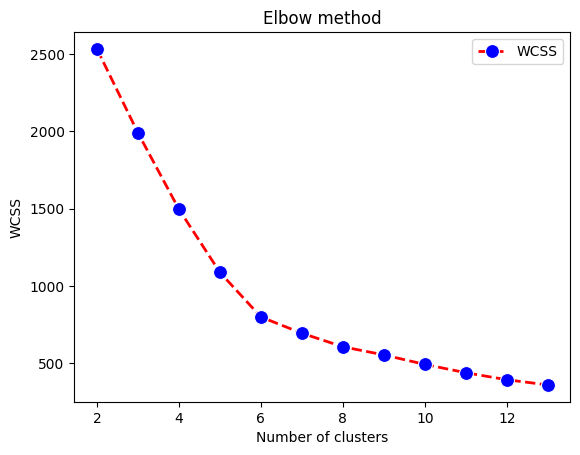

In [59]:
from sklearn.cluster import KMeans
wcss = []

len_sqrt = int(np.sqrt(len(df_read)))

X = df_read.drop("Spending Score (1-100)",axis=1)
for i in range(2,len_sqrt+1):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42,n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

sns.lineplot(x=range(2,len_sqrt+1),y=wcss,marker='o',color='red',markersize=10,markerfacecolor='blue',linewidth=2,linestyle='--',label="WCSS")
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

By using the elbow method we can say that the optimal k is 6. Lets visualize the clusters!

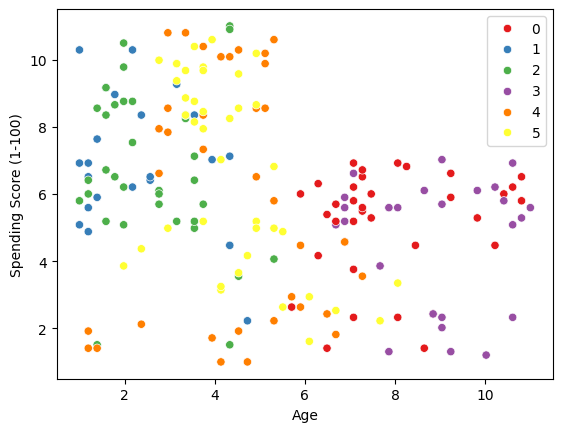

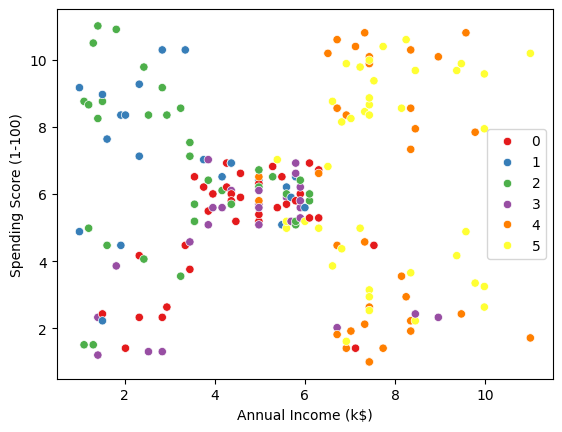

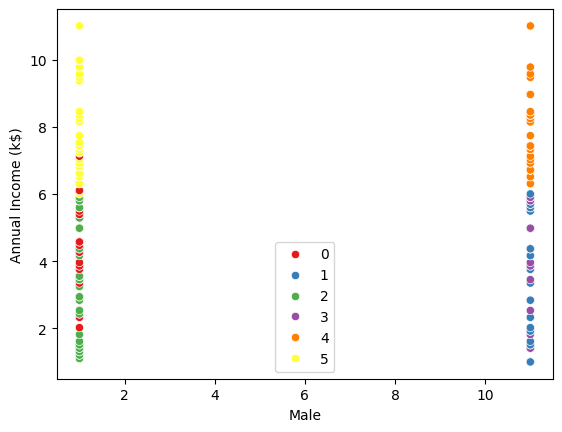

In [60]:
kmeans = KMeans(n_clusters=6,init='k-means++',random_state=0,n_init=10)

y_kmeans = kmeans.fit_predict(X)

sns.scatterplot(x=X.iloc[:,0],y=df_read['Spending Score (1-100)'],hue=y_kmeans,palette='Set1')
plt.show()

sns.scatterplot(x=X.iloc[:,1],y=df_read['Spending Score (1-100)'],hue=y_kmeans,palette='Set1')
plt.show()

sns.scatterplot(x=X.iloc[:,2],y=X.iloc[:,1],hue=y_kmeans,palette='Set1')
plt.show()


I couldn't see a good clusters when I visualize the data with 2 dimensions. That's why I'll use 3 dimensions to visualize the clusters.

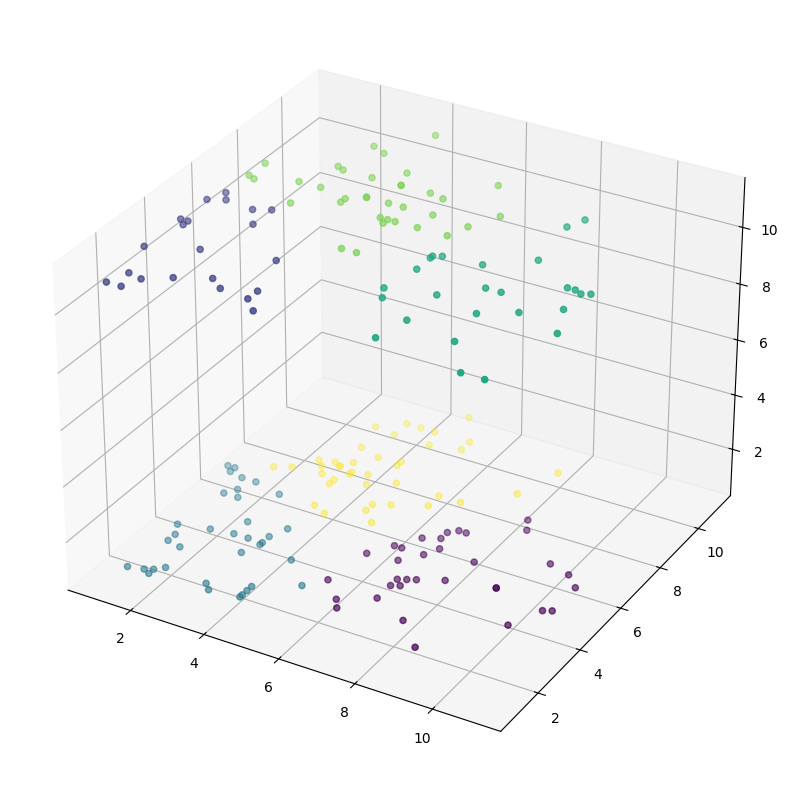

In [61]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X.iloc[:,0],X.iloc[:,1],X.iloc[:,2],c=y_kmeans)
plt.show()

Here we can see a better clusters since we used more than 2 dimensions to cluster the data.

The clusters are not perfect but we can see that there are 6 distinct clusters.

### 4.2. Hierarchical Agglomerative Clustering (HAC) on the Original Dataset

Apply HAC on the dataset, visualize the dendogram. Then, comment on whether the dendogram agrees with the clusters obtained by K-Means. Try with 2 different linkage methods.

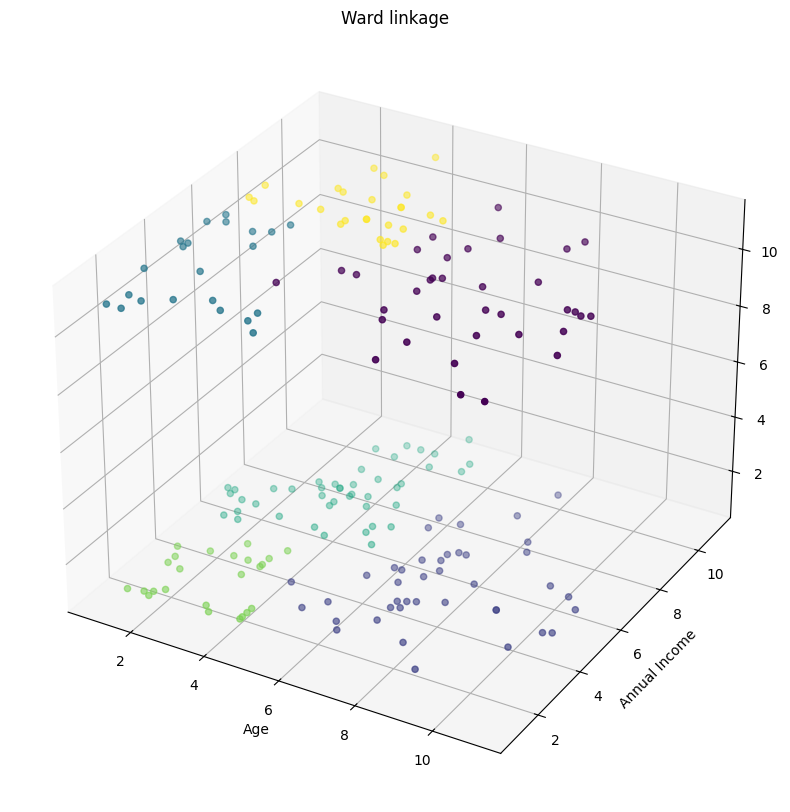

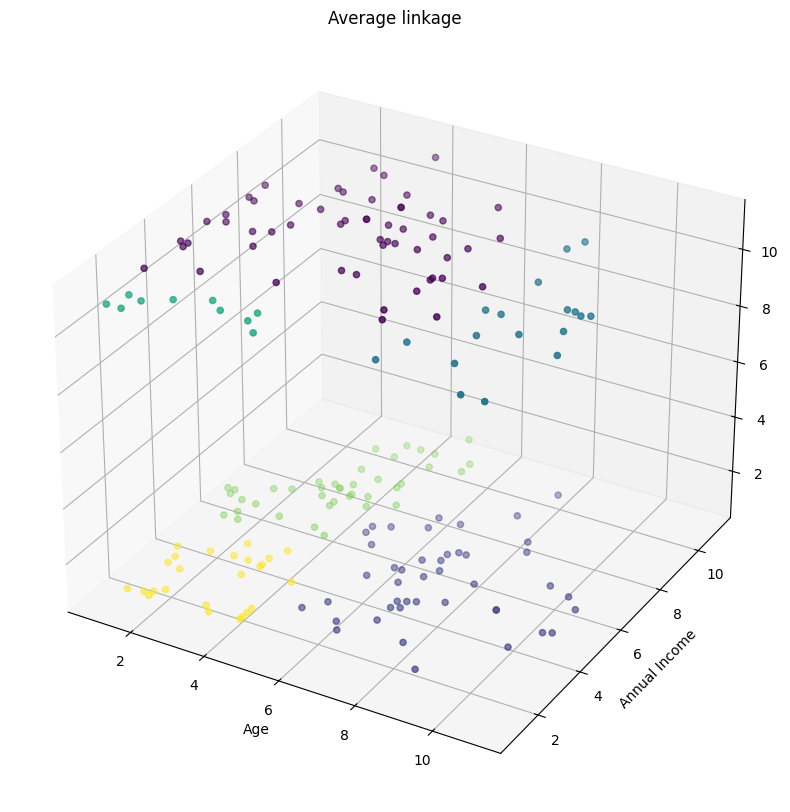

In [62]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=6,metric='euclidean',linkage='ward')
y_hc = hc.fit_predict(X)

hc2 = AgglomerativeClustering(n_clusters=6,metric='euclidean',linkage='average')
y_hc2 = hc2.fit_predict(X)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X.iloc[:,0],X.iloc[:,1],X.iloc[:,2],c=y_hc)
plt.title("Ward linkage")
plt.ylabel("Annual Income")
plt.xlabel("Age")
plt.show()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X.iloc[:,0],X.iloc[:,1],X.iloc[:,2],c=y_hc2)
plt.title("Average linkage")
plt.ylabel("Annual Income")
plt.xlabel("Age")
plt.show()

When we check the different linkage methods, we can see that there is a slight difference between the clusters.

But we can say that the clusters are similar to the clusters we obtained from K-Means.

The difference exists in the clusters which are male and age val. lower than 6.

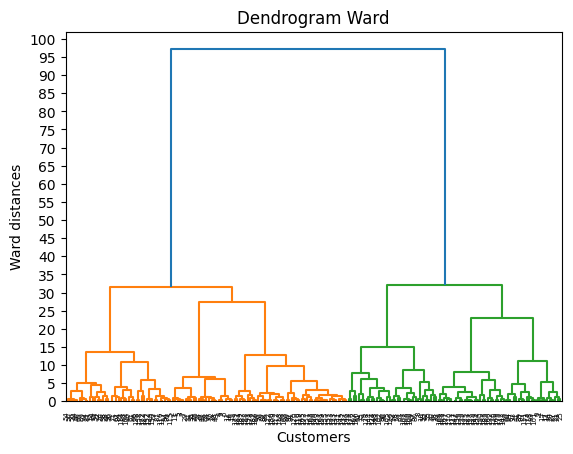

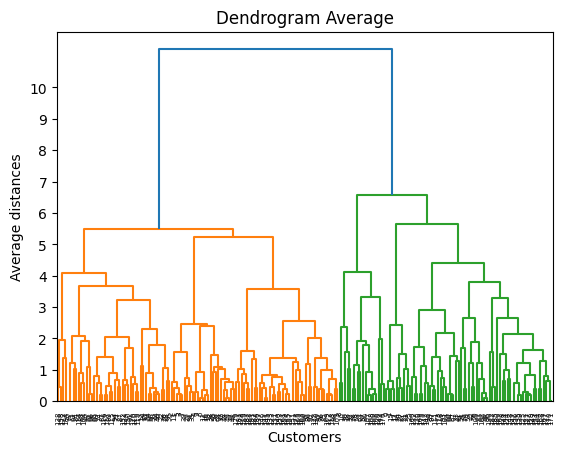

In [63]:
import scipy.cluster.hierarchy as sch
dendrogram_ward = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title("Dendrogram Ward")
plt.xlabel("Customers")
plt.ylabel("Ward distances")
plt.yticks(np.arange(0,105,5))
plt.show()

dendrogram_euclidean = sch.dendrogram(sch.linkage(X,method='average'))
plt.title("Dendrogram Average")
plt.xlabel("Customers")
plt.ylabel("Average distances")
plt.yticks(np.arange(0,11,1))
plt.show()


In the dendograms above we can cut them at 4,5,6 clusters.

We can distinguish the clusters more easily when we use ward distance.

In my opinion since we have used 6 clusters in K-Means, with the help of dendogram we can say that the optimal number of clusters is 6.


## 5. K-means Clustering with PCA

Choose the optimal k using the Elbow method. Then, visualize the resulting clusters with that k.

In [64]:
from sklearn.cluster import KMeans

len_sqrt = int(np.sqrt(len(df_read)))

wcss_pca = []

for i in range(2,len_sqrt+1):
    km_pca = KMeans(n_clusters=i,random_state=0,n_init=10)
    
    km_pca.fit(imp_features)
    print("For ",i," clusters, inertia is : ",km_pca.inertia_)
    wcss_pca.append(km_pca.inertia_)


For  2  clusters, inertia is :  3853.8058286030796
For  3  clusters, inertia is :  3111.743485486435
For  4  clusters, inertia is :  2402.873682451465
For  5  clusters, inertia is :  2072.5427790298872
For  6  clusters, inertia is :  1745.0366193012906
For  7  clusters, inertia is :  1510.5456629557852
For  8  clusters, inertia is :  1286.5614286934428
For  9  clusters, inertia is :  1115.3373418947567
For  10  clusters, inertia is :  966.1048039208827
For  11  clusters, inertia is :  863.3326375941517
For  12  clusters, inertia is :  777.5760529054866
For  13  clusters, inertia is :  727.347481061222


WCSS is the sum of squared distance between each point and the centroid in a cluster. The idea is to minimize the sum.

This loss function measures how much are clusters are dense they are. 

The more the clusters are dense, the lower the WCSS value is.

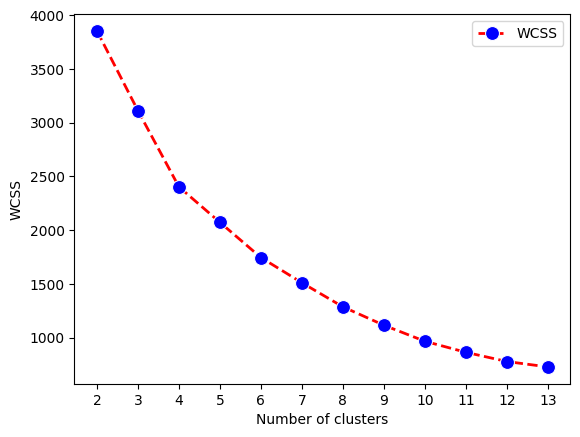

In [65]:
sns.lineplot(x=range(2,len_sqrt+1),y=wcss_pca,marker='o',color='red',markersize=10,markerfacecolor='blue',linewidth=2,linestyle='--',label="WCSS")
plt.xticks(range(2,len_sqrt+1))
plt.ylabel("WCSS")
plt.xlabel("Number of clusters")
plt.show()

Here we will use the Elbow method to find the optimal number of clusters.

We can see that the optimal number of clusters is 4.

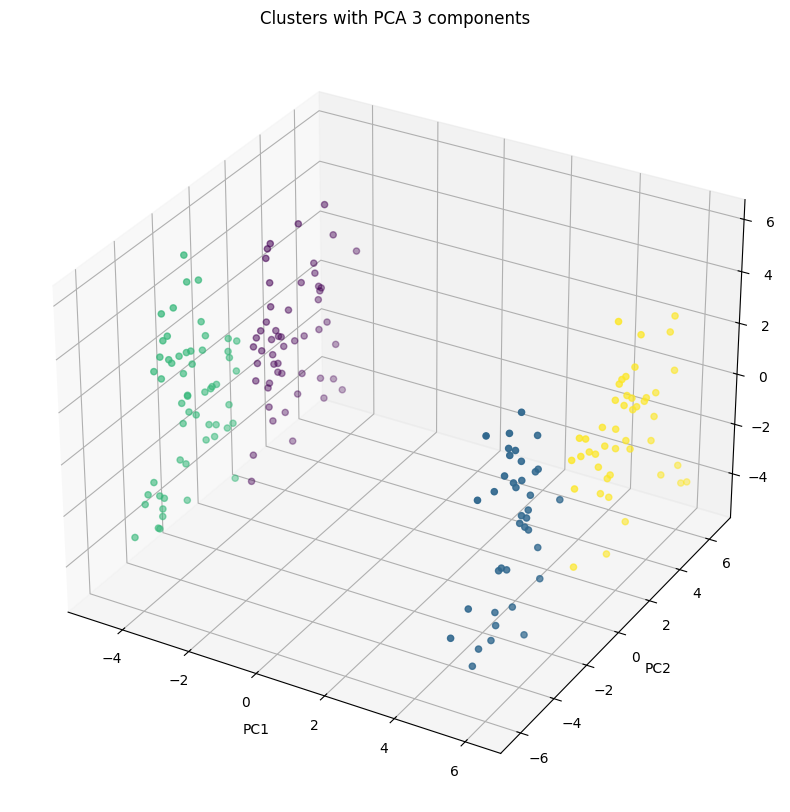

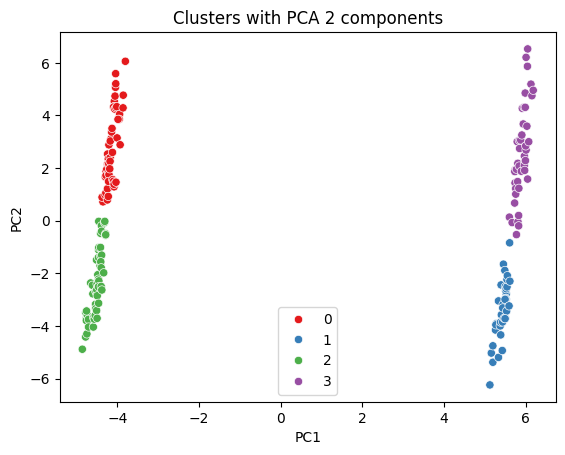

In [66]:
km_pca = KMeans(n_clusters=4,random_state=0,n_init=10)
km_pca.fit(imp_features)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(imp_features[:,0],imp_features[:,1],imp_features[:,2],c=km_pca.labels_)
plt.title("Clusters with PCA 3 components")
plt.ylabel("PC2")
plt.xlabel("PC1")
plt.show()

sns.scatterplot(x=imp_features[:,0],y=imp_features[:,1],hue=km_pca.labels_,palette='Set1')
plt.title("Clusters with PCA 2 components")
plt.ylabel("PC2")
plt.xlabel("PC1")
plt.show()

Here you can see that there exist 4 clusters when we visualize the data based on the 2 and 3 most important dimensions.

We can seperate the clusters using just 2 dimensions. However, I wanted to visualize the clusters with 3 dimensions to see if there exist a difference.

## 6. Evaluate the Clustering Results

* Evaluate and compare the clustering results obtained in 4.1 and 5 (k means with and without PCA) using the Silhouette Coefficients.
* Which is better?

Silhouette Coefficient is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

* 1: Means clusters are well seperated and distinct.
* 0: Means the distance between clusters is not significant, classes are very similar.
* -1: Means clusters are assigned in the wrong way.

So the higher the Silhouette Coefficient is, the better the clustering result is.

Without checking the Silhouette Coefficient, we can say that the clustering result with PCA is better since we can see the clusters more clearly.

Although we can see the clusters more clearly in the result with PCA, we can not say that it is better than the other one just checking it visually.

Lets calculate the Silhouette Coefficient for both of the results.

In [67]:
from sklearn.metrics import silhouette_score

print("Silhouette score with KMeans PCA : ",silhouette_score(imp_features,km_pca.labels_))
print("Silhouette score with KMeans : ",silhouette_score(X,kmeans.labels_))


Silhouette score with KMeans PCA :  0.3458666407645414
Silhouette score with KMeans :  0.4468572657891534


We can see that clustering without PCA gave a better result.

That's because we have used 6 clusters in the first one and 4 clusters in the second one.

When we checked both dendograms in HAC and Elbow method in K-Means, we can say that the optimal number of clusters is 6. 

That is, we can say that the clustering result without PCA is better.